Importing libraries and defining dataset

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_excel("autoMPG_data.xlsx")
df.head()

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3,Name
0,5.555556,5.555556,18.0,8,3.07,1.30,3.504,12.0,70,1,1,1,0,0,chevrolet chevelle malibu
1,6.666667,6.666667,15.0,8,3.50,1.65,3.693,11.5,70,1,1,1,0,0,buick skylark 320
2,5.555556,5.555556,18.0,8,3.18,1.50,3.436,11.0,70,1,1,1,0,0,plymouth satellite
3,6.250000,6.250000,16.0,8,3.04,1.50,3.433,12.0,70,1,1,1,0,0,amc rebel sst
4,5.882353,5.882353,17.0,8,3.02,1.40,3.449,10.5,70,1,1,1,0,0,ford torino


Removing unused columns

In [28]:
df = df.drop(['GallonsPer100MilesTo1981','MPG','Seconds0to60','Year70To81','Origin','Origin.Eq.1','Origin.Eq.2','Origin.Eq.3','Name'], axis=1)
df

,GallonsPer100Miles,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Year
0,5.555556,8,3.07,1.30,3.504,70
1,6.666667,8,3.50,1.65,3.693,70
2,5.555556,8,3.18,1.50,3.436,70
3,6.250000,8,3.04,1.50,3.433,70
4,5.882353,8,3.02,1.40,3.449,70
...,...,...,...,...,...,...
387,3.703704,4,1.40,0.86,2.790,82
388,2.272727,4,0.97,0.52,2.130,82
389,3.125000,4,1.35,0.84,2.295,82
390,3.571429,4,1.20,0.79,2.625,82


Creating linear regression model

In [29]:
reg = linear_model.LinearRegression()
reg.fit(df[['Cylinders','Displacement100ci','Horsepower100','Weight1000lb','Year']], df.GallonsPer100Miles)
print(reg)

LinearRegression()


corelations for all variables

In [30]:
print("coefficients: \n", reg.coef_)

coefficients: 
 [ 0.13371072 -0.1973791   0.84659195  1.21643552 -0.1279646 ]


Determining the best variable based on coefficients and Intercept

In [31]:
X = df['Weight1000lb'].to_frame()
y = df['GallonsPer100Miles']

Weight_model = linear_model.LinearRegression().fit(X.values,y)

In [32]:
X = df['Cylinders'].to_frame()
Cylinders_model = linear_model.LinearRegression().fit(X.values,y)

In [33]:
X = df['Horsepower100'].to_frame()

HorsePower_model = linear_model.LinearRegression().fit(X.values,y)

In [34]:
print("Weight :       // Coefficients: ", Weight_model.coef_, "Intercept:  ",Weight_model.intercept_)
print("HorsePower :       // Coefficients: ", HorsePower_model.coef_, "Intercept:  ",HorsePower_model.intercept_)
print("Cylinders :       // Coefficients: ", Cylinders_model.coef_, "Intercept:  ",Cylinders_model.intercept_)



Weight :       // Coefficients:  [1.73378735] Intercept:   -0.3802549901551373
HorsePower :       // Coefficients:  [3.69527283] Intercept:   0.9218138877684874
Cylinders :       // Coefficients:  [0.81879613] Intercept:   0.30184050062373124


Making predections

In [35]:
print("Fuel consuption = ", HorsePower_model.predict(pd.DataFrame([3])))

Fuel consuption =  [12.00763238]


In [36]:
print("Fuel consuption = ", HorsePower_model.predict(pd.DataFrame([1.65])))

Fuel consuption =  [7.01901406]


Plot model error terms as scatterplot

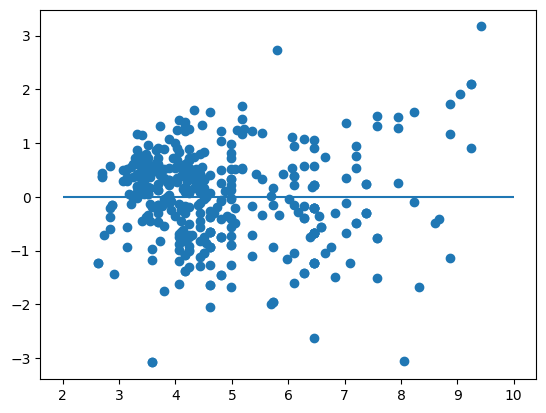

In [37]:
plt.scatter(HorsePower_model.predict(X.values), HorsePower_model.predict(X.values)-y)
plt.hlines(y=0,xmin=2,xmax=10)

In [38]:
print( "This model explains", (HorsePower_model.score(X.values,y))*100, "% of fuel consumption")

This model explains 73.06976406434582 % of fuel consumption


In [39]:
print("mean squared error: %.2f" %mean_squared_error(HorsePower_model.predict(X.values), HorsePower_model.predict(X.values)-y))

mean squared error: 25.63


Interpolation and Extrapolation range

<AxesSubplot: >

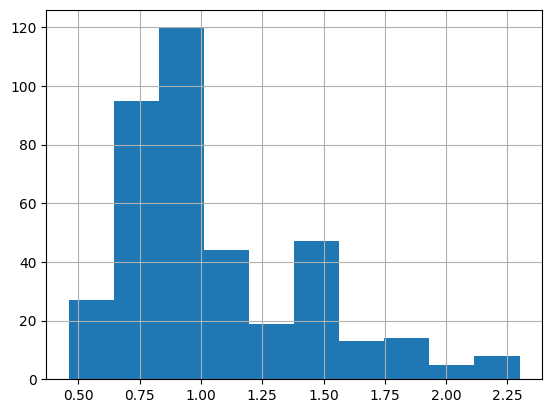

In [40]:
df['Horsepower100'].hist()

Interpolation range

In [41]:
print("Fuel consumption = ", HorsePower_model.predict(pd.DataFrame([1.25])))

Fuel consumption =  [5.54090493]


Extrapolation range

In [42]:
print("Fuel consumption = ", HorsePower_model.predict(pd.DataFrame([0.25])))

Fuel consumption =  [1.8456321]
